In [ ]:
!git clone https://github.com/swapnilGhosh007/dataset

fatal: destination path 'dataset' already exists and is not an empty directory.


In [ ]:
!ls dataset

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [ ]:
datadir = 'dataset'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-59-efd08640a7c7>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\center_2023_05_09_13_01_37_240.jpg   
1  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\center_2023_05_09_13_01_37_313.jpg   
2  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\center_2023_05_09_13_01_37_383.jpg   
3  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\center_2023_05_09_13_01_37_454.jpg   
4  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\center_2023_05_09_13_01_37_521.jpg   

                                                                                               left  \
0  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\left_2023_05_09_13_01_37_240.jpg   
1  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\left_2023_05_09_13_01_37_313.jpg   
2  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\left_2023_05_09_13_01_37_383.jpg   
3  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\left_2023_05_09_13_01_37_454.jpg   
4  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\left_2023_05_09_13_01_37_521.jpg   

                                                                                               right  \
0  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\right_2023_05_09_13_01_37_240.jpg   
1  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\right_2023_05_09_13_01_37_313.jpg   
2  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\right_2023_05_09_13_01_37_383.jpg   
3  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\right_2023_05_09_13_01_37_454.jpg   
4  E:\final\A-self-driving-car-using-behavioral-cloning-master\IMG\right_2023_05_09_13_01_37_521.jpg   

   steering  throttle  reverse     speed  
0  0.0       1.0       0.0      6.797819  
1  0.0       1.0       0.0      7.482350  
2  0.0       1.0       0.0      8.388793  
3  0.0       1.0       0.0      9.063974  
4  0.0       1.0       0.0      9.958133

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2023_05_09_13_01_37_240.jpg  left_2023_05_09_13_01_37_240.jpg   
1  center_2023_05_09_13_01_37_313.jpg  left_2023_05_09_13_01_37_313.jpg   
2  center_2023_05_09_13_01_37_383.jpg  left_2023_05_09_13_01_37_383.jpg   
3  center_2023_05_09_13_01_37_454.jpg  left_2023_05_09_13_01_37_454.jpg   
4  center_2023_05_09_13_01_37_521.jpg  left_2023_05_09_13_01_37_521.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2023_05_09_13_01_37_240.jpg  0.0       1.0       0.0      6.797819  
1  right_2023_05_09_13_01_37_313.jpg  0.0       1.0       0.0      7.482350  
2  right_2023_05_09_13_01_37_383.jpg  0.0       1.0       0.0      8.388793  
3  right_2023_05_09_13_01_37_454.jpg  0.0       1.0       0.0      9.063974  
4  right_2023_05_09_13_01_37_521.jpg  0.0       1.0       0.0      9.958133

total data: 22769


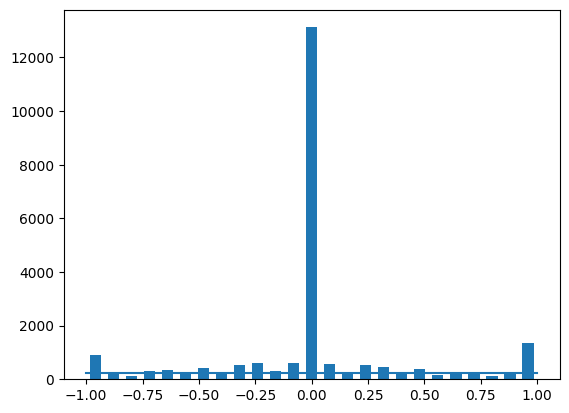

In [ ]:
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
print('total data:', len(data))

removed: 17006
remaining: 5763


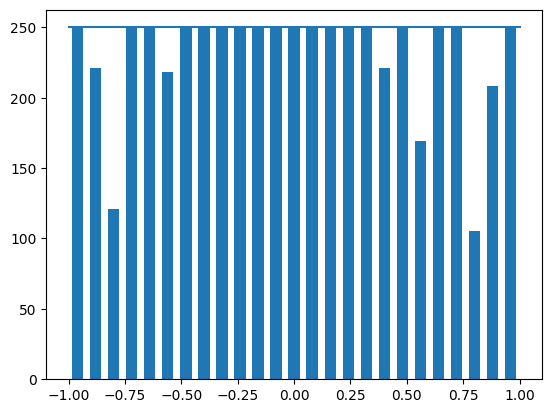

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


In [ ]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

center      center_2023_05_09_13_01_40_616.jpg
left        left_2023_05_09_13_01_40_616.jpg  
right       right_2023_05_09_13_01_40_616.jpg 
steering    0.15                              
throttle    0.0                               
reverse     0.0                               
speed       26.27518                          
Name: 49, dtype: object


Training Samples: 13831
Valid Samples: 3458


Text(0.5, 1.0, 'Validation set')

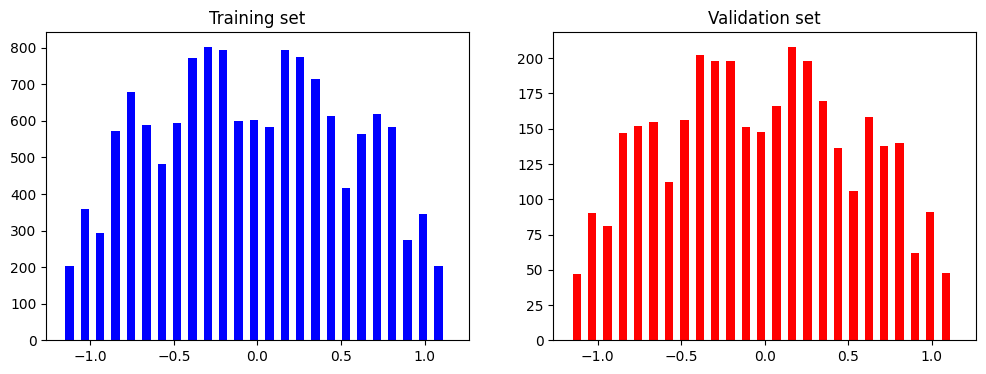

In [ ]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

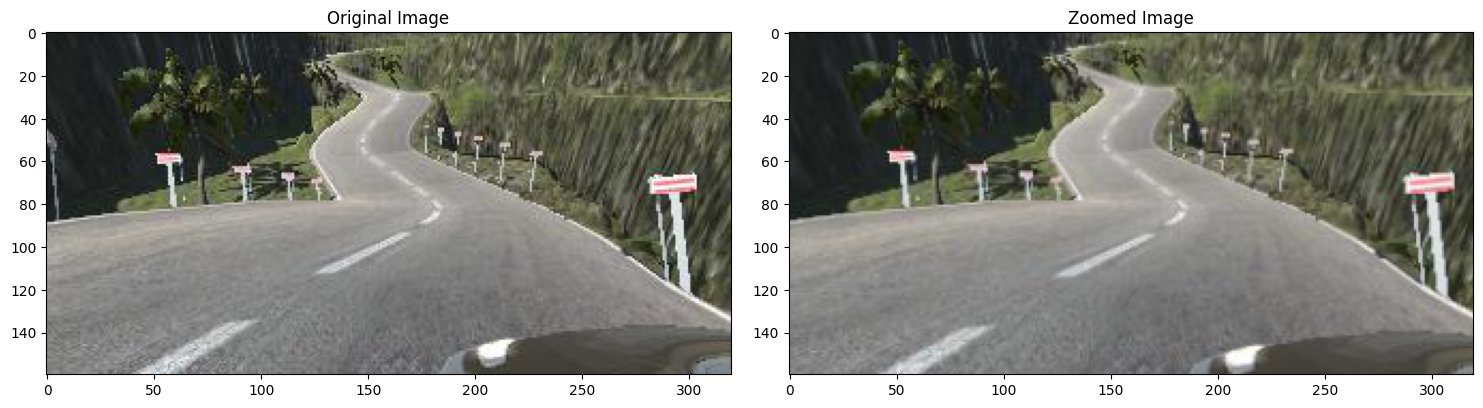

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

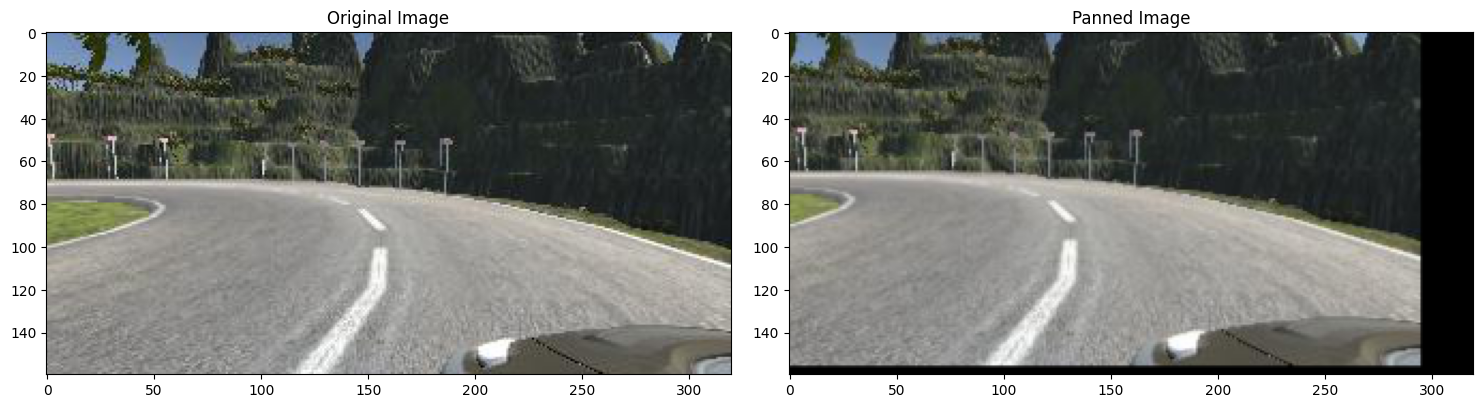

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

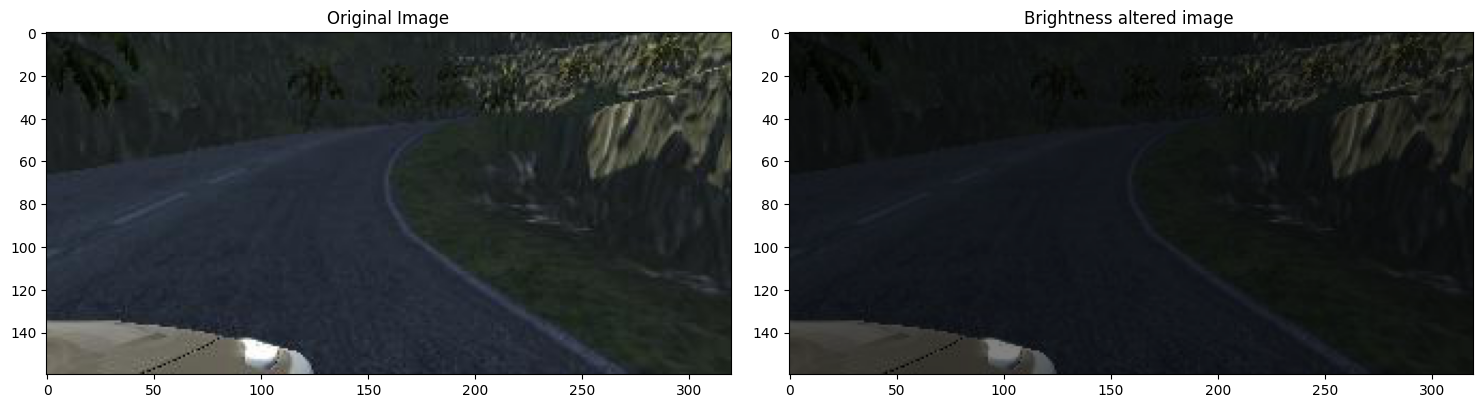

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.9500001')

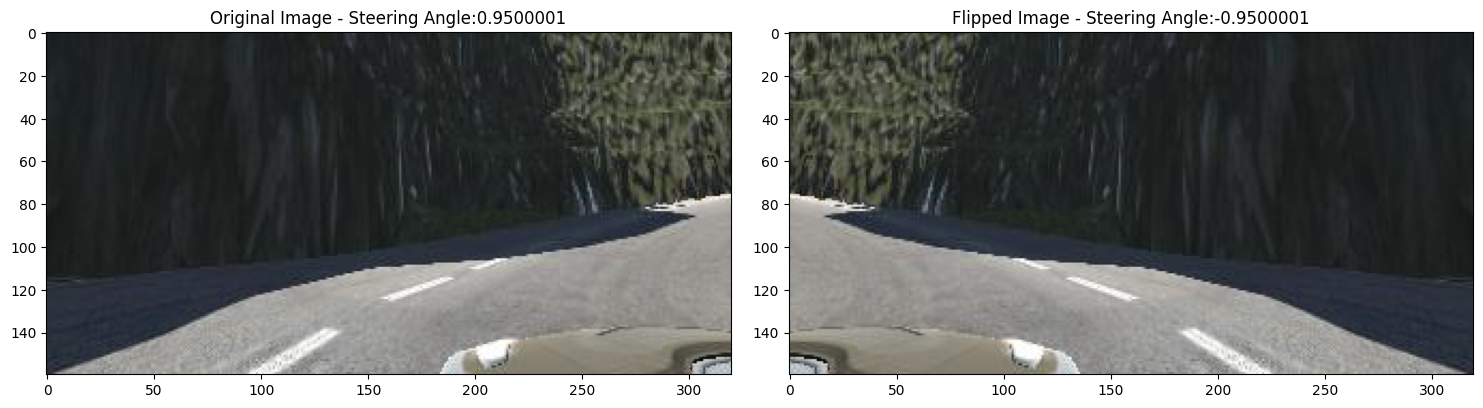

In [ ]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

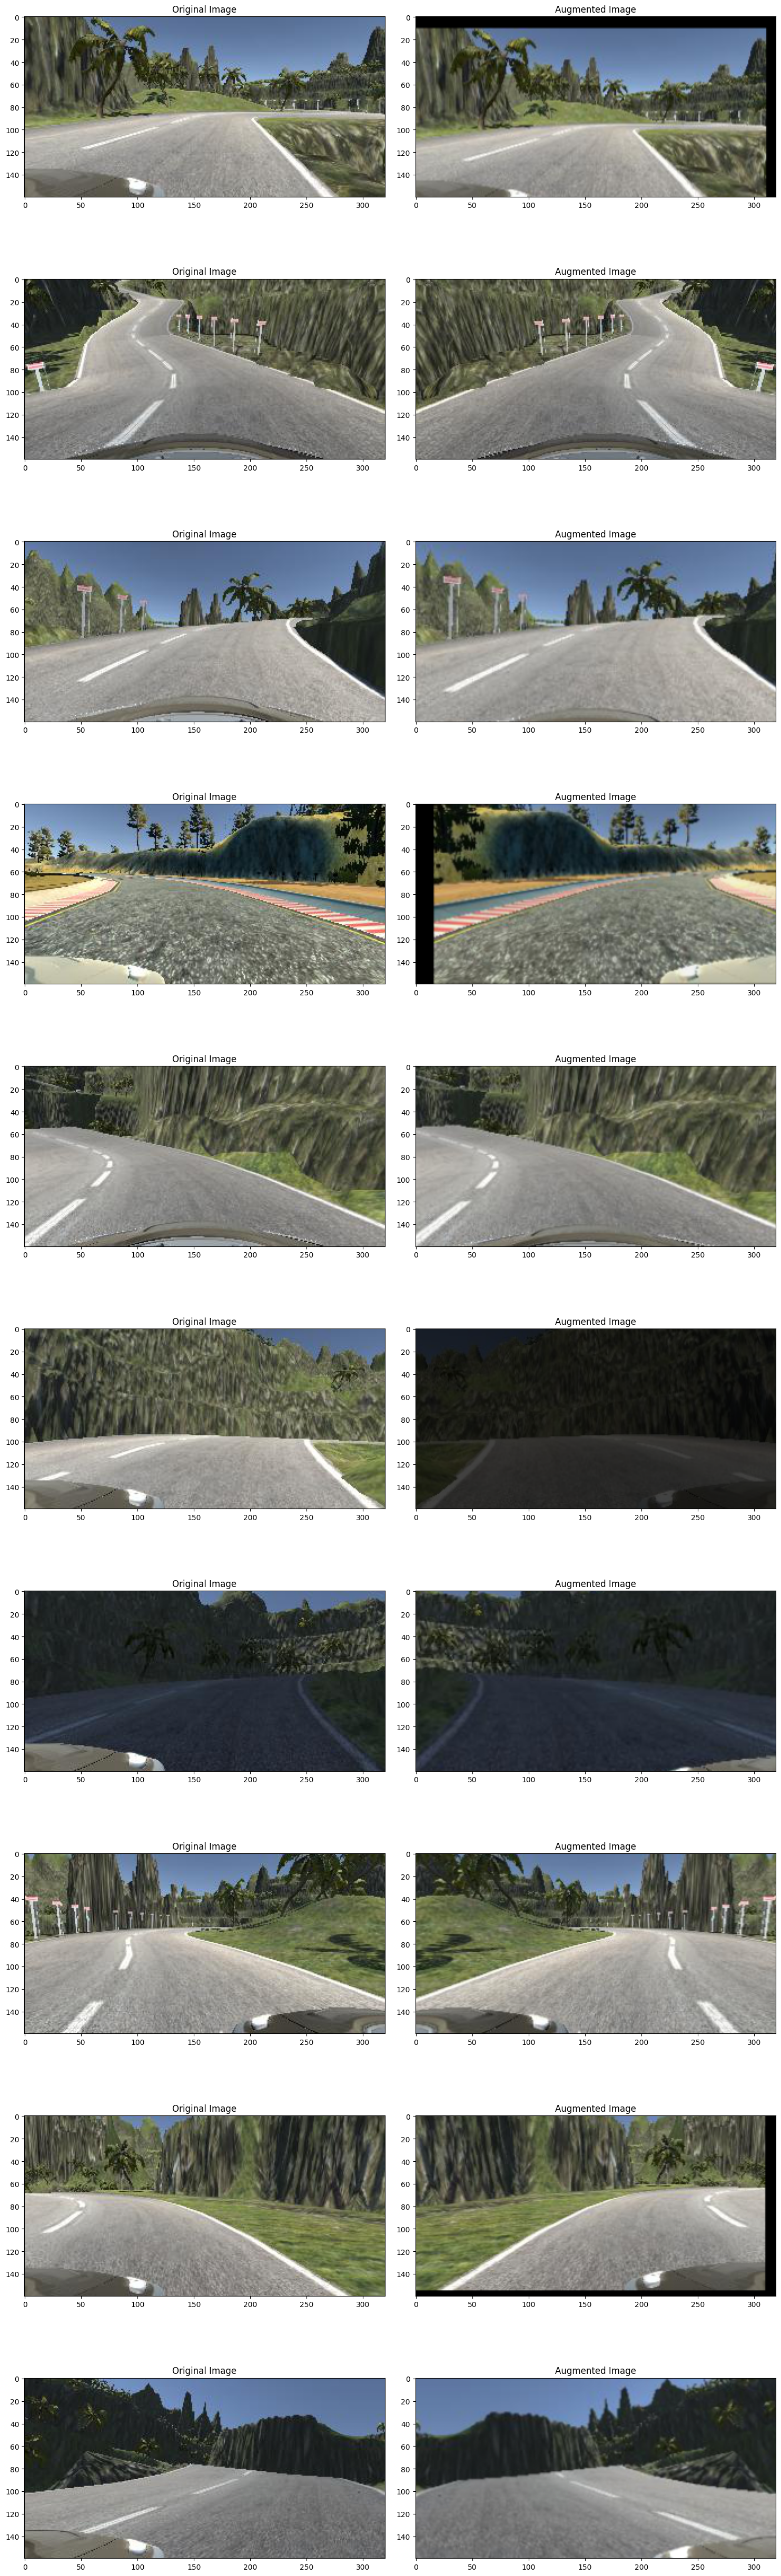

In [ ]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

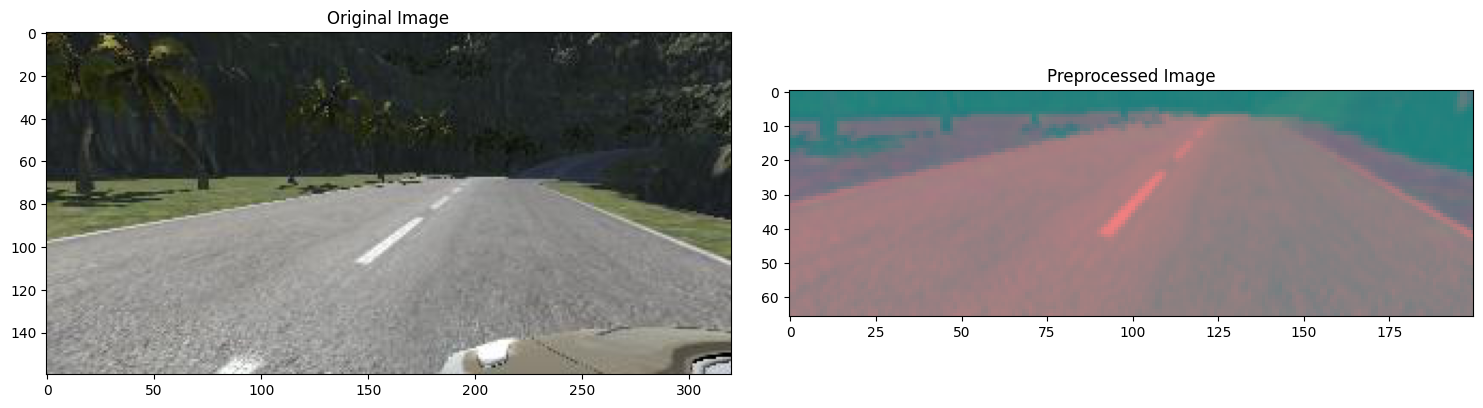

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  
     

Text(0.5, 1.0, 'Validation Image')

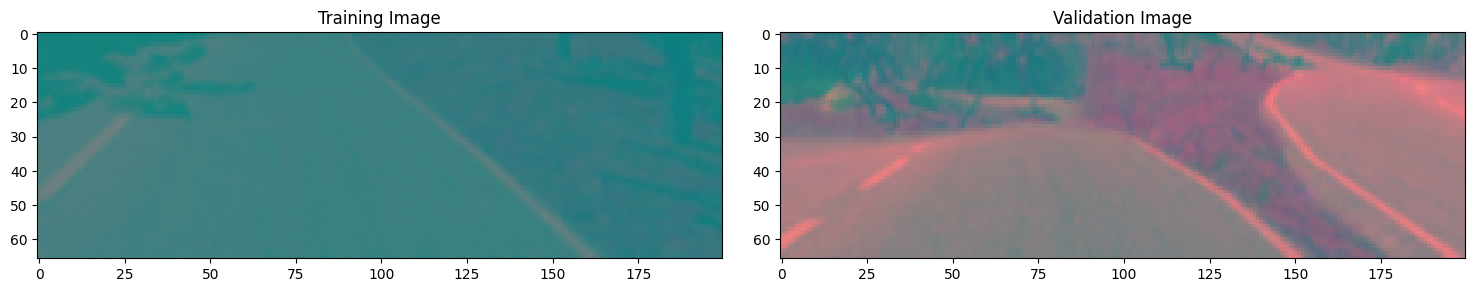

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,(5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='relu'))
  model.add(Convolution2D(36, (5,5), strides=(2, 2), activation='relu'))
  model.add(Convolution2D(48, (5,5), strides=(2, 2), activation='relu'))
  model.add(Convolution2D(64, (3,3), activation='relu'))
  
  model.add(Convolution2D(64, (3,3), activation='relu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'relu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'relu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'relu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(learning_rate=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model
model = nvidia_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_20 (Dense)            (None, 100)              

In [ ]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 416s 1s/step - loss: 0.2474 - val_loss: 0.2046
Epoch 2/10
300/300 [==============================] - 381s 1s/step - loss: 0.2044 - val_loss: 0.1627
Epoch 3/10
300/300 [==============================] - 381s 1s/step - loss: 0.1827 - val_loss: 0.1538
Epoch 4/10
300/300 [==============================] - 368s 1s/step - loss: 0.1692 - val_loss: 0.1479
Epoch 5/10
300/300 [==============================] - 366s 1s/step - loss: 0.1647 - val_loss: 0.1324
Epoch 6/10
300/300 [==============================] - 365s 1s/step - loss: 0.1591 - val_loss: 0.1312
Epoch 7/10
300/300 [==============================] - 379s 1s/step - loss: 0.1526 - val_loss: 0.1350
Epoch 8/10
300/300 [==============================] - 379s 1s/step - loss: 0.1502 - val_loss: 0.1326
Epoch 9/10
300/300 [==============================] - 379s 1s/step - loss: 0.1422 - val_loss: 0.1252
Epoch 10/10
300/300 [==============================] - 378s 1s/step - loss: 0.1416 - val_lo

Text(0.5, 0, 'Epoch')

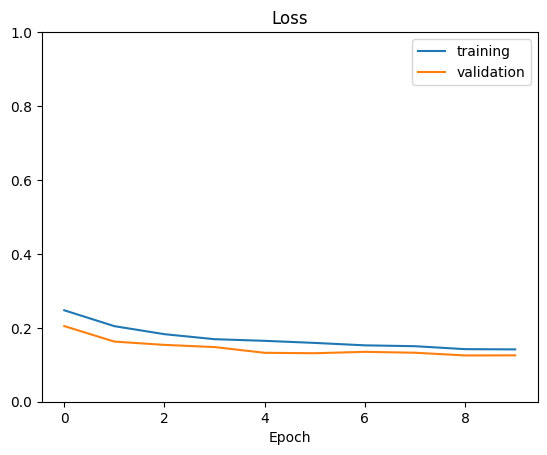

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.ylim([0,1])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>